In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("state_crime.csv")

In [6]:
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [86]:
states = list(df["State"].unique())

# Remove the United States row which is not used in the statistics and would mess with indexing
idx = -1
for i, s in enumerate(states):
    if s == "United States":
        idx = i
states.pop(idx)

'United States'

In [248]:
# This maps the state to the year interval in which death penalty was legal. For example see the first element Alabama,
# death penalty was legal between 1960 to 1972, and then from 1976 to 2019. Notice that the minimum year is 1960, and 
# the maximum is 2019, this is because the dataset corresponds to those years too.
# An empty array therefore means that the death penalty was never legal between 1960-2019
death_penalty_intervals_per_state = {
    "Alabama": [(1960, 1972), (1976, 2019)],
    "Alaska": [],
    "Arizona": [(1960, 1972), (1973, 2019)],
    "Arkansas": [(1960, 1972), (1973, 2012), (2017, 2019)],
    # California is a bit of an odd one. It was removed and reinstated twice, once for a couple of months
    # in 1972, and once for a year in 1976-1977. I doubt these changes would affect crime rates due to the volatility
    "California": [(1960, 1972), (1977, 2019)],
    # Colorado voted in 2020 to abolish, but this is not in the dataset so ignored
    "Colorado": [(1960, 1972), (1977, 2019)],
    "Connecticut": [(1960, 1972), (1976, 2012)],
    # DC not present in the dataset
    # "DC": [(1960, 1972)],
    "Delaware": [(1961, 1972), (1974, 2016)],
    "District of Columbia": [(1960, 1972)],
    # Immediately re-instated after Furman, wouldn't make a difference to add the interval
    "Florida": [(1960, 2015), (2017, 2019)],
    "Georgia": [(1960, 1972), (1973, 2019)],
    "Hawaii": [],
    "Idaho": [(1960, 1972), (1973, 2019)],
    # Moratorium 2000
    "Illinois": [(1960, 1972), (1974, 2011)],
    "Indiana": [(1960, 1972), (1973, 2019)],
    "Iowa": [(1960, 1965)],
    "Kansas": [(1960, 1972), (1994, 2019)],
    "Kentucky": [(1960, 1972), (1975, 2019)],
    "Louisiana": [(1960, 1972), (1973, 2019)],
    "Maine": [],
    # Moratorium 2001
    "Maryland": [(1960, 1972), (1978, 2013)],
    "Massachusetts": [(1960, 1972), (1984, 2019)],
    "Michigan": [(1960, 1963)],
    "Minnesota": [],
    "Mississippi": [(1960, 1972), (1974, 2019)],
    "Missouri": [(1960, 1972), (1975, 2019)],
    "Montana": [(1960, 1972), (1974, 2019)],
    # They managed to remove it for just a whole year, wow! Make your mind Nebraska
    "Nebraska": [(1960, 1972), (1973, 2015), (2016, 2019)],
    "Nevada": [(1960, 1972), (1973, 2019)],
    "New Hampshire": [(1960, 1972), (1991, 2019)],
    "New Jersey": [(1960, 1972), (1982, 2009)],
    "New Mexico": [(1960, 1972), (1976, 2009)],
    "New York": [(1960, 1972), (1995, 2007)],
    "North Carolina": [(1960, 1972), (1977, 2019)],
    "North Dakota": [(1960, 1972)],
    "Ohio": [(1960, 1972), (1974, 2019)],
    "Oklahoma": [(1960, 1972), (1973, 2019)],
    "Oregon": [(1960, 1964), (1978, 2019)],
    "Pennsylvania": [(1960, 1972), (1974, 1977), (1978,2019)],
    "Rhode Island": [(1960, 1972), (1973, 1979)],
    "South Carolina": [(1960, 1972), (1974, 2019)],
    "South Dakota": [(1960, 1972), (1979, 2019)],
    "Tennessee": [(1960, 1972), (1979, 2019)],
    "Texas": [(1960, 1972), (1974, 2019)],
    "Utah": [(1960, 1972), (1973, 2019)],
    # Bit of a special case, see source for info
    "Vermont": [(1960, 1965)],
    "Virginia": [(1960, 1972), (1975, 2019)],
    "Washington": [(1960, 1972), (1975, 2018)],
    "West Virginia": [(1960, 1965)],
    "Wisconsin": [],
    "Wyoming": [(1960, 1972), (1977, 2019)]
}

In [115]:
def plot_state(df, state, subplot, value_name, ylabel):
    """ Plots the graph for a state """
    query_df = df[df.State == state]
    
    subplot.title.set_text(state)
    subplot.set_xlabel("Year")
    subplot.set_ylabel(ylabel)
    subplot.plot(query_df["Year"], query_df[value_name])
    
    for start,end in death_penalty_intervals_per_state[state]:
        subplot.axvspan(start, end, alpha=0.1, color='red')   

# All the murder rate plots

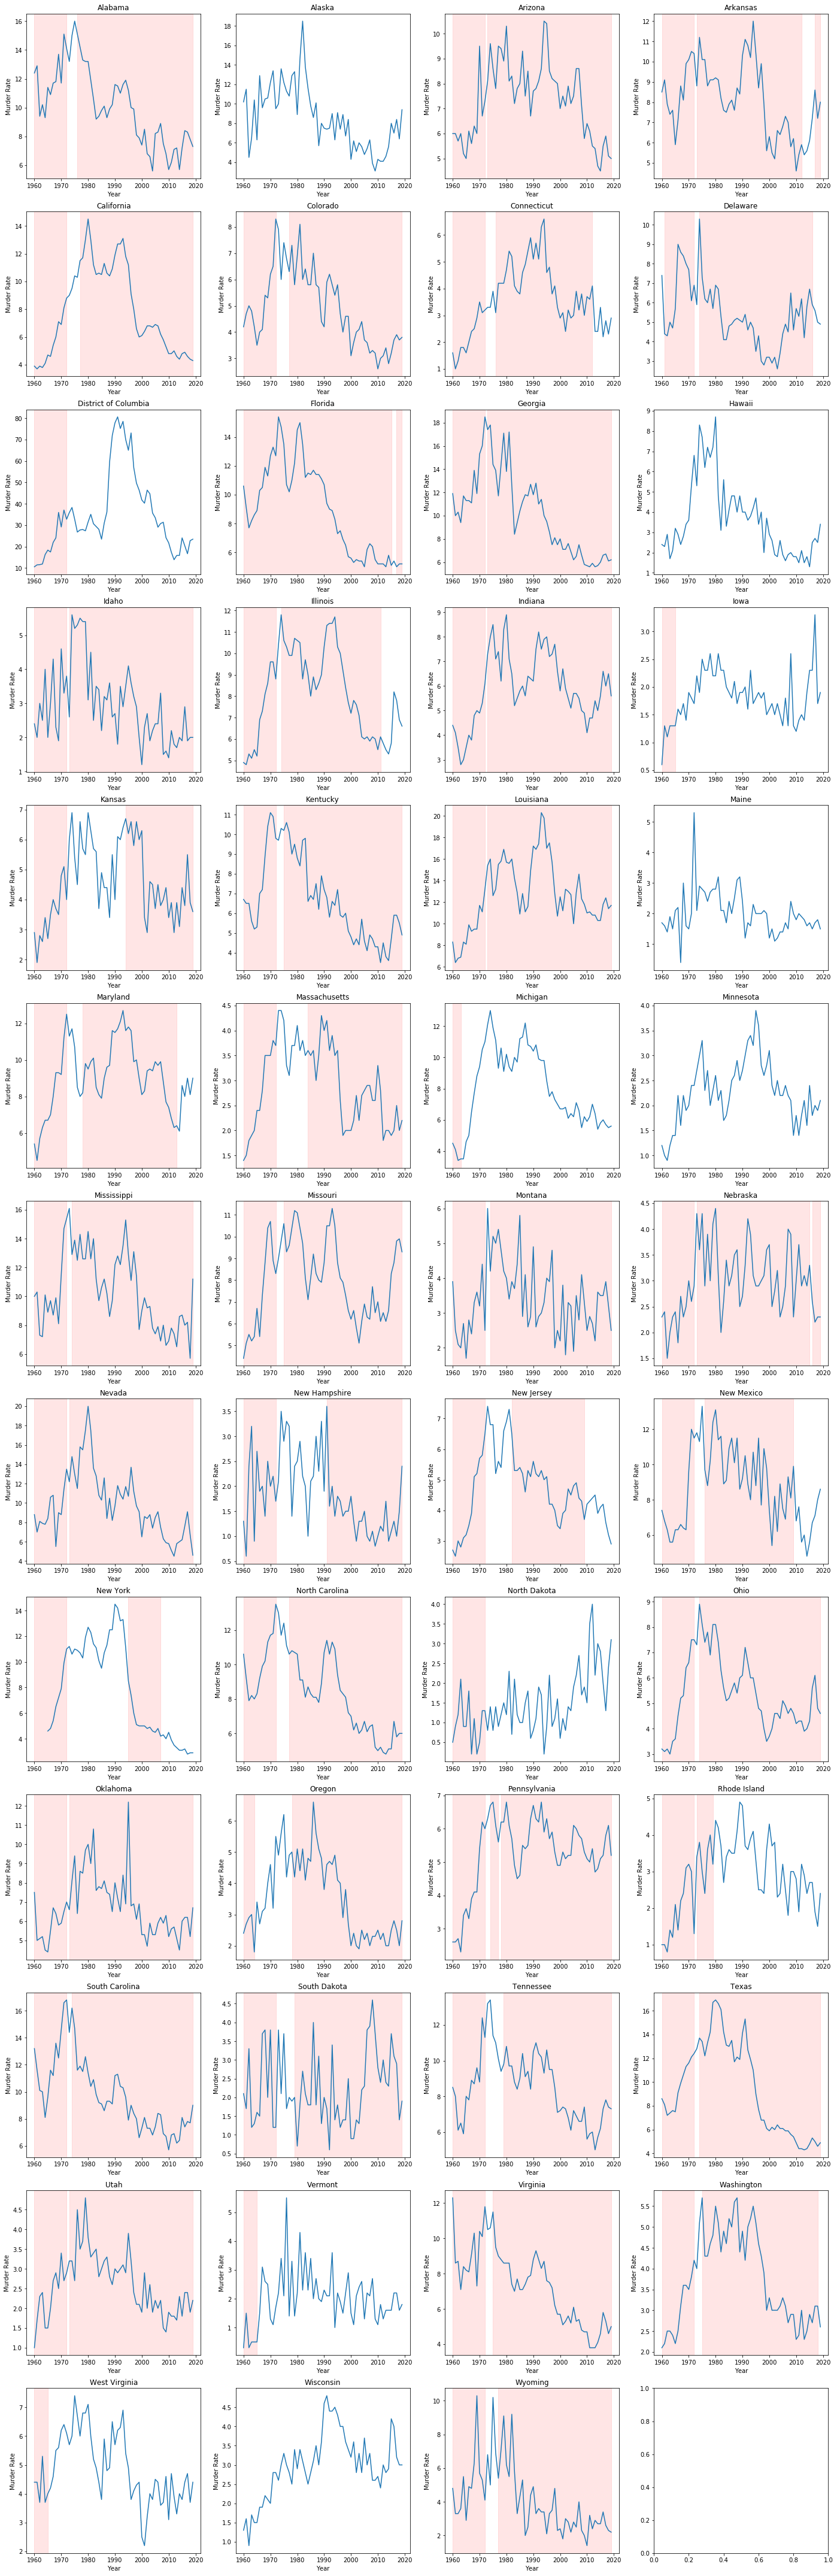

In [124]:
fig, plots = plt.subplots(nrows=13, ncols=4, figsize=(24,6*13))
for i, state in enumerate(states):
    if state == "United States": 
        continue
    
    subplot = plots[i//4][i%4]
    plot_state(df, state, subplot, "Data.Rates.Violent.Murder", ylabel="Murder Rate")

# fig.savefig("figures/total_violent_crime_rate_per_year.png")

In [97]:
fig.savefig("figures/total_violent_crime_rate_per_year.png")

# Michigan analysis

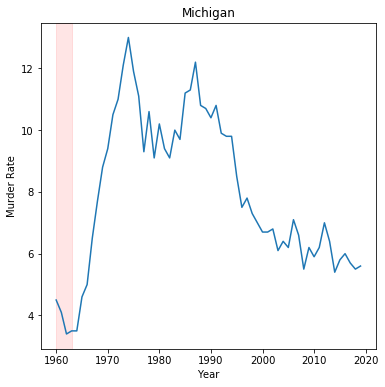

In [120]:
fig, plot = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plot_state("Michigan", plot, value_name="Data.Rates.Violent.Murder", ylabel="Murder Rate")
fig.savefig("figures/murder_rate_michigan.png")

## Similar states

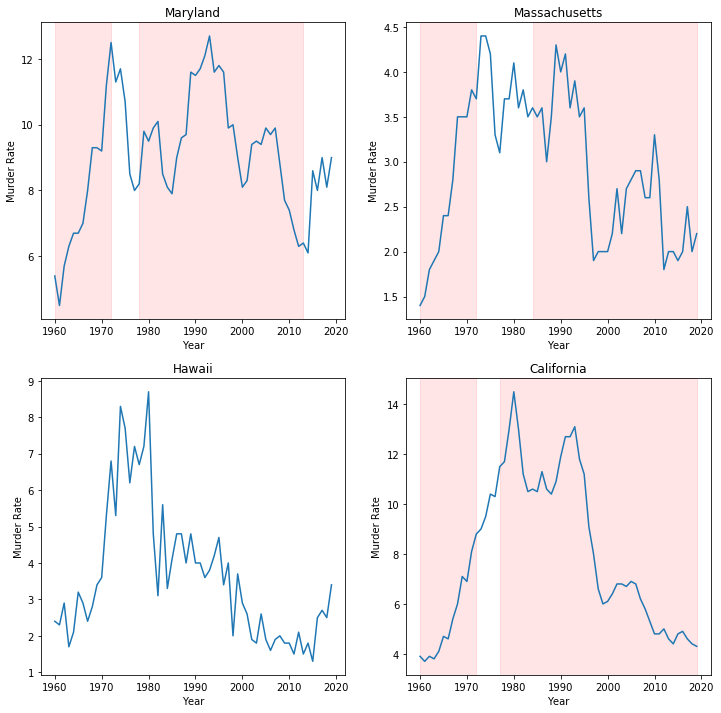

In [126]:
fig, plots = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

plot_state(df, "Maryland", plots[0][0], value_name="Data.Rates.Violent.Murder", ylabel="Murder Rate")
plot_state(df, "Massachusetts", plots[0][1], value_name="Data.Rates.Violent.Murder", ylabel="Murder Rate")
plot_state(df, "Hawaii", plots[1][0], value_name="Data.Rates.Violent.Murder", ylabel="Murder Rate")
plot_state(df, "California", plots[1][1], value_name="Data.Rates.Violent.Murder", ylabel="Murder Rate")

fig.savefig("figures/murder_rate_michigan_similar_states.png")

In [139]:
# See the median population to compare different states
print(df[df.State == "Michigan"]["Data.Population"][1:20].median())
print(df[df.State == "California"]["Data.Population"][1:20].median())
print(df[df.State == "Maryland"]["Data.Population"][1:20].median())
print(df[df.State == "Massachusetts"]["Data.Population"][1:20].median())
print(df[df.State == "Hawaii"]["Data.Population"][1:20].median())
print(df[df.State == "Wisconsin"]["Data.Population"][1:20].median())


8875083.0
19953134.0
3922399.0
5689170.0
789000.0
4417933.0


# Rhode Island, the antithesis state

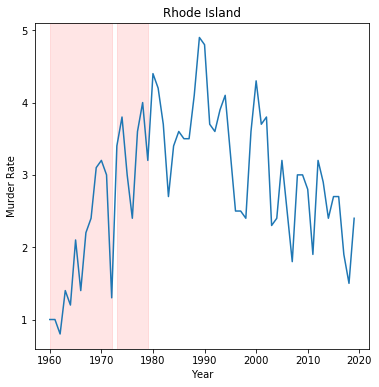

In [146]:
fig, plot = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
plot_state("Rhode Island", plot, value_name="Data.Rates.Violent.Murder", ylabel="Murder Rate")
fig.savefig("figures/murder_rate_rhode_island.png")

# Global view of murder rates in the U.S.

In [155]:
df["Murders"] = (df["Data.Rates.Violent.Murder"] * (df["Data.Population"] / 100000)).round()
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery,Murders
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,33823,11626,19344,2853,6097,4512,406,281,898,405.0
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,32541,11205,18801,2535,5564,4255,427,252,630,426.0
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,35829,11722,21306,2801,5283,3995,316,218,754,316.0
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,38521,12614,22874,3033,6115,4755,340,192,828,341.0
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,46290,15898,26713,3679,7260,5555,316,397,992,317.0


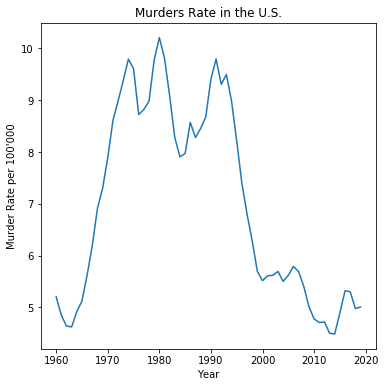

In [172]:
fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
subplot.plot(df.groupby(df.Year).Murders.sum() / (df.groupby(df.Year)["Data.Population"].sum() / 100000))

subplot.title.set_text("Murders Rate in the U.S.")
subplot.set_xlabel("Year")
subplot.set_ylabel("Murder Rate per 100'000")

fig.savefig("figures/total_murders_per_year.png")


In [237]:
list(df[(df["Year"] == year) & (df["State"] == state)]["Data.Population"])[0]

1302161

In [247]:
df.State.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [239]:
df[(df["Year"] == year) & (df["State"] == state)]

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery,Murders


In [250]:
state_population

'Data.Population'

In [268]:
number_of_state_with_death_penalty_per_year = [0]*60
normalised_number_of_state_with_death_penalty_per_year = [0]*60

for i, year in enumerate(range(1960,2020)):
    total_population = df.groupby(df.Year)["Data.Population"].sum()[year]
    
    for state, intervals in death_penalty_intervals_per_state.items():
        for interval in intervals:
            if year >= interval[0] and year <= interval[1]:
                
                try:
                    query = df[(df["Year"] == year) & (df["State"] == state)]
                    state_population = list(query["Data.Population"])[0]
                except IndexError:
                    # New York is missing rows between 1960 and 1965, add this exception to print it and make it clear
                    print(f"Value does not exist for {state}, {year}")
                    continue
                
                number_of_state_with_death_penalty_per_year[i] += 1.0
                
                # instead of +1, we normalise by the population and do + (state population) / (total population)
                # Note: the output is not a percentage, but is linearly proportional and so is fine for correlation computation
                normalised_state_population = state_population / total_population
                normalised_number_of_state_with_death_penalty_per_year[i] += normalised_state_population
                
number_of_state_with_death_penalty_per_year =  np.array(number_of_state_with_death_penalty_per_year)
number_of_state_with_death_penalty_per_year /= 52

Value does not exist for New York, 1960
Value does not exist for New York, 1961
Value does not exist for New York, 1962
Value does not exist for New York, 1963
Value does not exist for New York, 1964


In [194]:
murder_rate = np.array(df.groupby(df.Year).Murders.sum() / (df.groupby(df.Year)["Data.Population"].sum() / 100000))

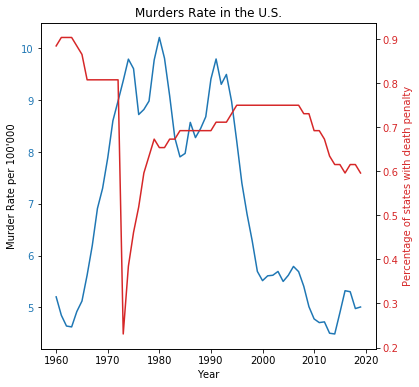

In [226]:
fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
year_range = range(1960, 2020)


color = 'tab:blue'
subplot.title.set_text("Murders Rate in the U.S.")
subplot.set_xlabel("Year")
subplot.set_ylabel("Murder Rate per 100'000")
subplot.tick_params(axis='y', labelcolor=color)
subplot.plot(year_range, murder_rate)



fig.savefig("figures/total_murders_per_year.png")

ax2 = subplot.twinx()

color = 'tab:red'
ax2.set_ylabel('Percentage of states with death penalty', color=color)  # we already handled the x-label with ax1
ax2.plot(year_range, number_of_state_with_death_penalty_per_year, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.savefig("figures/total_murders_per_year_vs_state_with_dp.png")

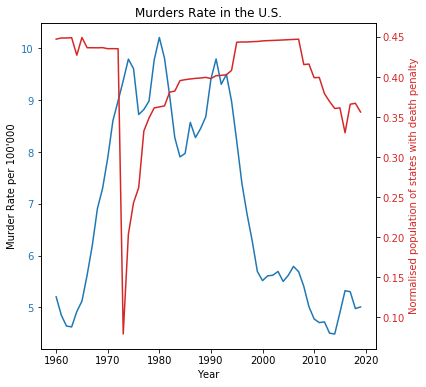

In [270]:
fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
year_range = range(1960, 2020)


color = 'tab:blue'
subplot.title.set_text("Murders Rate in the U.S.")
subplot.set_xlabel("Year")
subplot.set_ylabel("Murder Rate per 100'000")
subplot.tick_params(axis='y', labelcolor=color)
subplot.plot(year_range, murder_rate)



fig.savefig("figures/total_murders_per_year.png")

ax2 = subplot.twinx()

color = 'tab:red'
ax2.set_ylabel('Normalised population of states with death penalty', color=color)  # we already handled the x-label with ax1
ax2.plot(year_range, normalised_number_of_state_with_death_penalty_per_year, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# fig.savefig("figures/total_murders_per_year_vs_state_with_dp.png")

In [272]:
np.corrcoef(murder_rate, number_of_state_with_death_penalty_per_year)


array([[ 1.      , -0.382573],
       [-0.382573,  1.      ]])

In [271]:
np.corrcoef(murder_rate, normalised_number_of_state_with_death_penalty_per_year)

array([[ 1.        , -0.40736043],
       [-0.40736043,  1.        ]])